            Temp
Date            
01-01-1981  20.7
02-01-1981  17.9
03-01-1981  18.8
04-01-1981  14.6
05-01-1981  15.8
06-01-1981  15.8
07-01-1981  15.8
08-01-1981  17.4
09-01-1981  21.8
10-01-1981  20.0
11-01-1981  16.2
12-01-1981  13.3
13-01-1981  16.7
14-01-1981  21.5
15-01-1981  25.0
16-01-1981  20.7
17-01-1981  20.6
18-01-1981  24.8
19-01-1981  17.7
20-01-1981  15.5


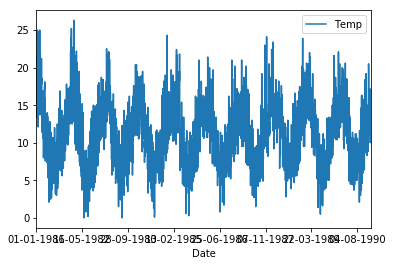

Dataset 3643, Validation 7
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3285
Model:                     ARMA(7, 1)   Log Likelihood               -8689.286
Method:                       css-mle   S.D. of innovations              3.408
Date:                Sat, 19 Oct 2019   AIC                          17398.571
Time:                        14:48:46   BIC                          17459.542
Sample:                             0   HQIC                         17420.401
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.132      0.113      0.910      -0.244       0.274
ar.L1.y        1.1436      0.287      3.983      0.000       0.581       1.706
ar.L2.y       -0.4355    

In [2]:

#!/usr/bin/env python
# coding: utf-8

# In[34]:

# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
import numpy
# load dataset
series = read_csv('/Users/rachanabk/Desktop/dataset2.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))


# In[35]:

# line plot of dataset
series.plot()
pyplot.show()


# In[36]:

# split the dataset
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)


# In[37]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)


# In[38]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# In[39]:

X = series.values


# In[40]:

days_in_year = 365


# In[41]:

differenced = difference(X, days_in_year)


# In[42]:

model = ARIMA(differenced, order=(7,0,1))


# In[43]:

model_fit = model.fit(disp=0)


# In[44]:

print(model_fit.summary())


# In[45]:

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


# In[46]:

forecast = model_fit.forecast()[0]


# In[47]:

forecast = inverse_difference(X, forecast, days_in_year)


# In[48]:

print('Forecast: %f' % forecast)


# In[49]:

# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)


# start_index='1990-12-25'

# In[50]:

print(forecast)


# In[51]:

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]


# In[52]:

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1





